In [2]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import json
import numpy as np
import pickle

from plot_utils import utils as plot_utils
from models import utils as model_utils
from labels import utils as label_utils
from weights import utils as weight_utils
from backtest import utils as backtest_utils

2024-02-09 11:59:51.031782: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 11:59:51.031804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 11:59:51.031823: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 11:59:51.035994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 11:59:51.458177: W tensorflow/compiler/

## Load Data

In [2]:
WINDOW_SIZE = 60
TRAIN = 'train'
TEST = 'test'
# RAW DATA
raw_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
raw_train_df.index = pd.to_datetime(raw_train_df.index)
raw_train_X = model_utils.get_X(raw_train_df, WINDOW_SIZE)
raw_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
raw_test_df.index = pd.to_datetime(raw_test_df.index)
raw_test_X = model_utils.get_X(raw_test_df, WINDOW_SIZE)
# FEATURED DATA
feat_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
feat_train_df.index = pd.to_datetime(feat_train_df.index)
feat_train_X = model_utils.get_X(feat_train_df, WINDOW_SIZE)
feat_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
feat_test_df.index = pd.to_datetime(feat_test_df.index)
feat_test_X = model_utils.get_X(feat_test_df, WINDOW_SIZE)
# LABELS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    labels_train_dict = pickle.load(file)
Y_train_dict = {}
for label_name in labels_train_dict.keys():
    Y_train_dict[label_name] = model_utils.get_Y_or_W(labels_train_dict[label_name], WINDOW_SIZE)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y_or_W(labels_test_dict[label_name], WINDOW_SIZE)
# WEIGHTS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    weights_train_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    weights_test_dict = pickle.load(file)

## Data Presentation

In [5]:
def print_data_info(data_df):
    print(f'\tShape: {data_df.shape}')
    start_date = data_df.index[0].strftime('%Y-%m-%d %H:%M:%S')
    end_date = data_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')
    print(f'\tDates from {start_date} to {end_date}')

print('RAW DATA')
print(f'\tColumns:\n\t{", ".join(raw_train_df.columns.tolist())}')

print('Raw TRAIN data')
print_data_info(raw_train_df)

print(f'Raw TEST data')
print_data_info(raw_test_df)

print('=====================================================================================================')

print('FEATURED DATA')
print(f'\tColumns:\n\t{", ".join(feat_train_df.columns.tolist())}')

print('Featured TRAIN data')
print_data_info(feat_train_df)

print(f'Featured TEST data')
print_data_info(feat_test_df)

RAW DATA
	Columns:
	Open, High, Low, Close, Volume
Raw TRAIN data
	Shape: (166268, 5)
	Dates from 2010-10-11 13:41:00 to 2012-11-06 15:59:00
Raw TEST data
	Shape: (2961, 5)
	Dates from 2012-11-07 10:31:00 to 2012-11-20 15:59:00
FEATURED DATA
	Columns:
	Open, High, Low, Close, Volume, Returns, Volatility, Max_Drawdown, Max_Drawup, Volume_Change, ADX, APO, CCI, DX, MFI, RSI, ULTOSC, WILLR, NATR, Alpha, Beta, Index_Returns, Index_Volatility, Correlation, Covariance, Beta_Direct, TF_Max_Drawdown, TF_Max_Drawup, Return_Skewness, Return_Kurtosis, Asset_To_Index_Alpha, Asset_To_Index_Beta, sin_Day_of_Week, cos_Day_of_Week, sin_Day_of_Month, cos_Day_of_Month, sin_Day_of_Year, cos_Day_of_Year, sin_time_of_day, cos_time_of_day
Featured TRAIN data
	Shape: (166268, 40)
	Dates from 2010-10-11 13:41:00 to 2012-11-06 15:59:00
Featured TEST data
	Shape: (2961, 40)
	Dates from 2012-11-07 10:31:00 to 2012-11-20 15:59:00


## Label Plots

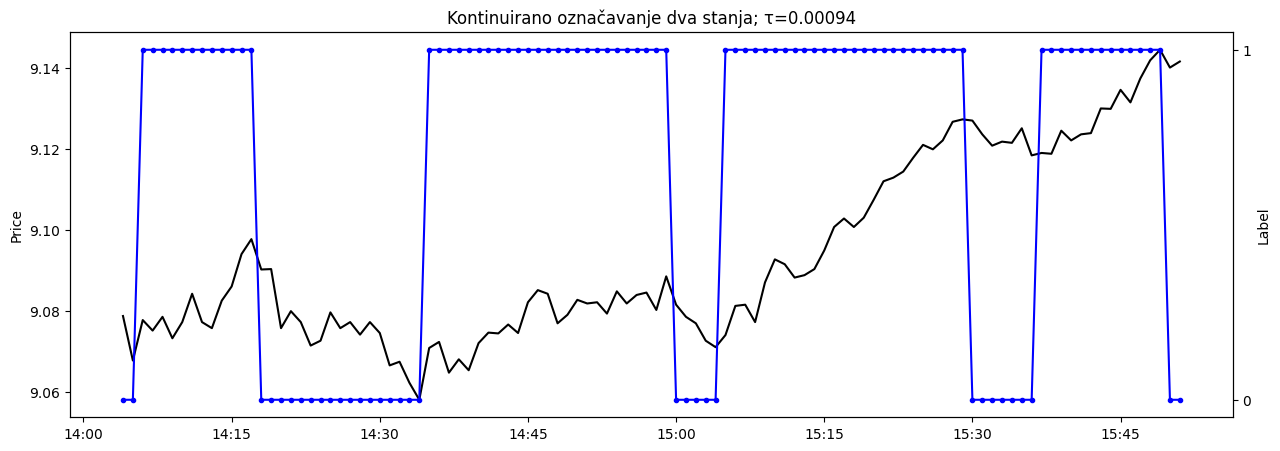

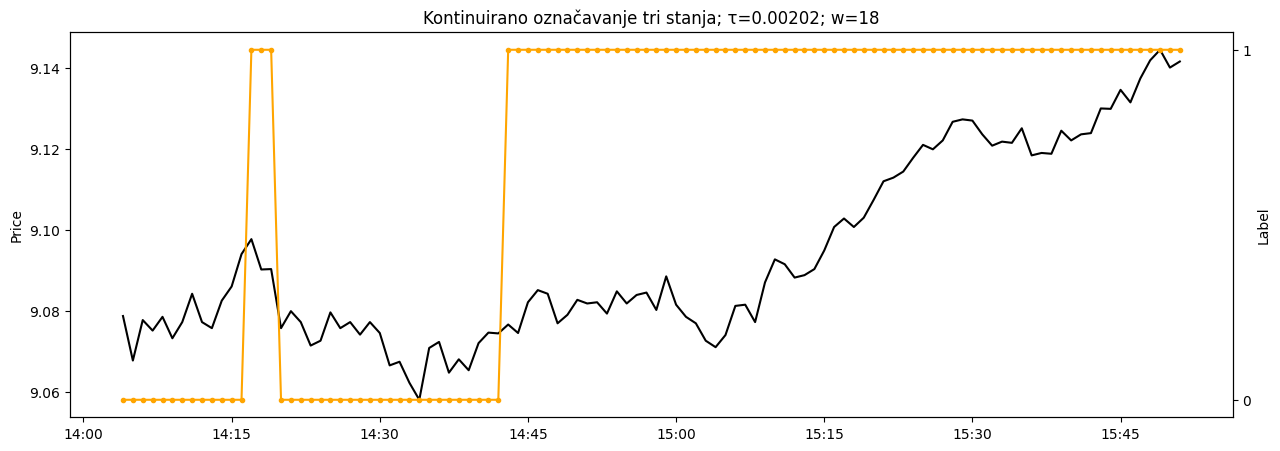

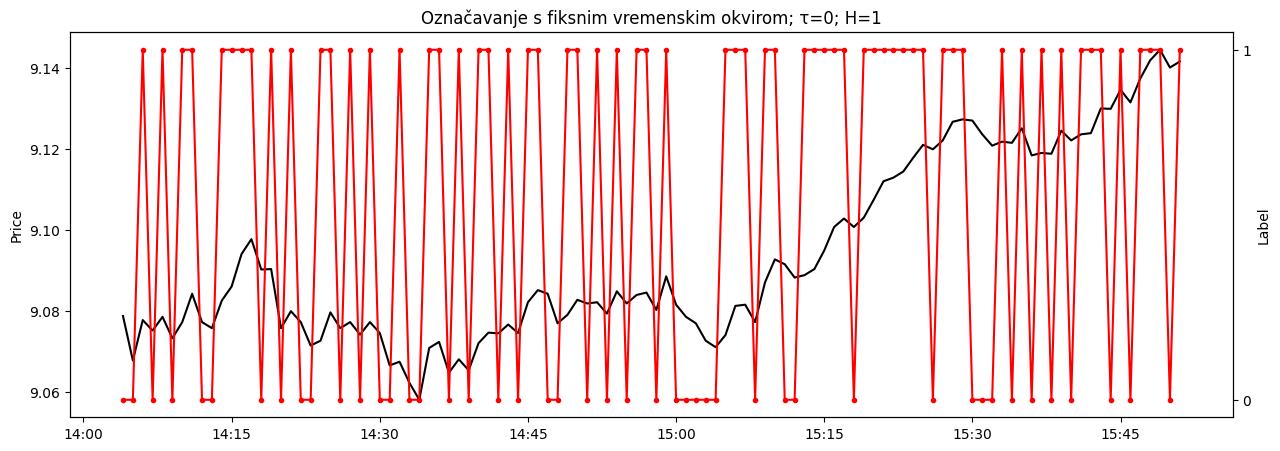

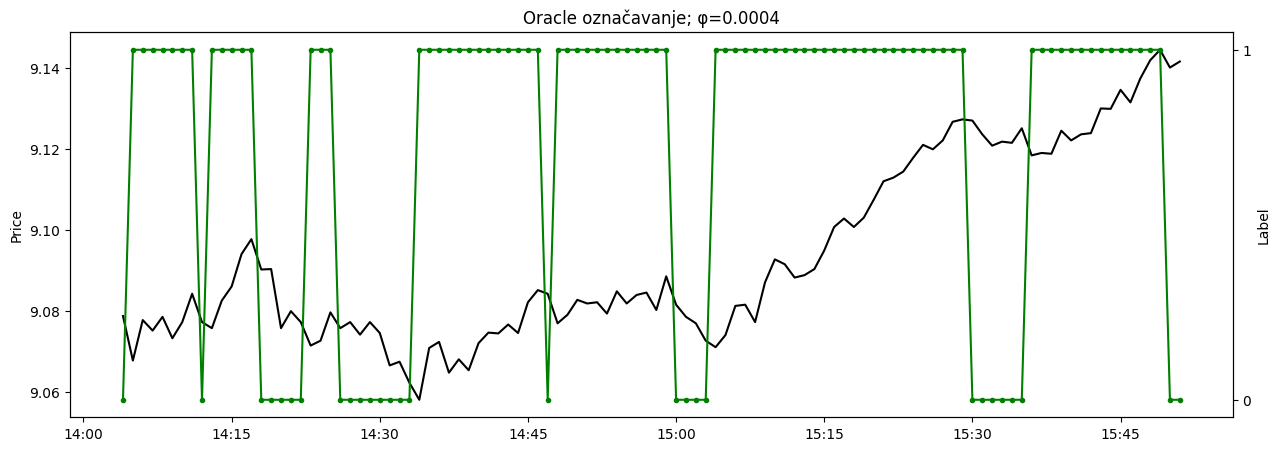

In [4]:
start_index = 352
end_index = 460
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels_dict = {}
for label_name in labels_train_dict.keys():
    labels_dict[label_name] = labels_train_dict[label_name][start_index:end_index]

# plot_utils.plot_labels('Labels', prices, labels_dict)

# for label_key, label_series in labels_test_dict.items():
#     print(f"Count of unique values for {label_key}:")
#     print(label_series.value_counts())
    
tau_symbol = '\u03C4'
phi_symbol = '\u03C6'
label_utils.plot_labels(f'Kontinuirano označavanje dva stanja; {tau_symbol}=0.00094', prices, labels_dict['ct_two_state'], 'blue')
label_utils.plot_labels(f'Kontinuirano označavanje tri stanja; {tau_symbol}=0.00202; w=18', prices, labels_dict['ct_three_state'], 'orange')
label_utils.plot_labels(f'Označavanje s fiksnim vremenskim okvirom; {tau_symbol}=0; H=1', prices, labels_dict['fixed_time_horizon'], 'red')
label_utils.plot_labels(f'Oracle označavanje; {phi_symbol}=0.0004', prices, labels_dict['oracle'], 'green')

## Cross-Validation Indices Example

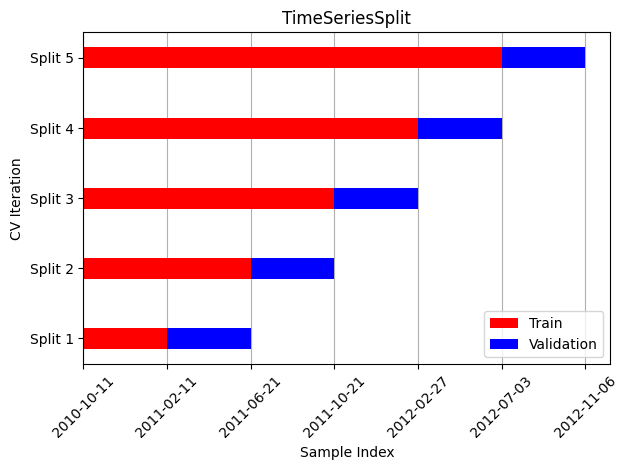

In [3]:
cd_indices = model_utils.custom_time_series_split(feat_train_df, n_splits=5)
cd_indices_list = [(train_index, test_index) for train_index, test_index in cd_indices]
plot_utils.plot_cv_indices(feat_train_df, cd_indices_list)

## Return Distribution

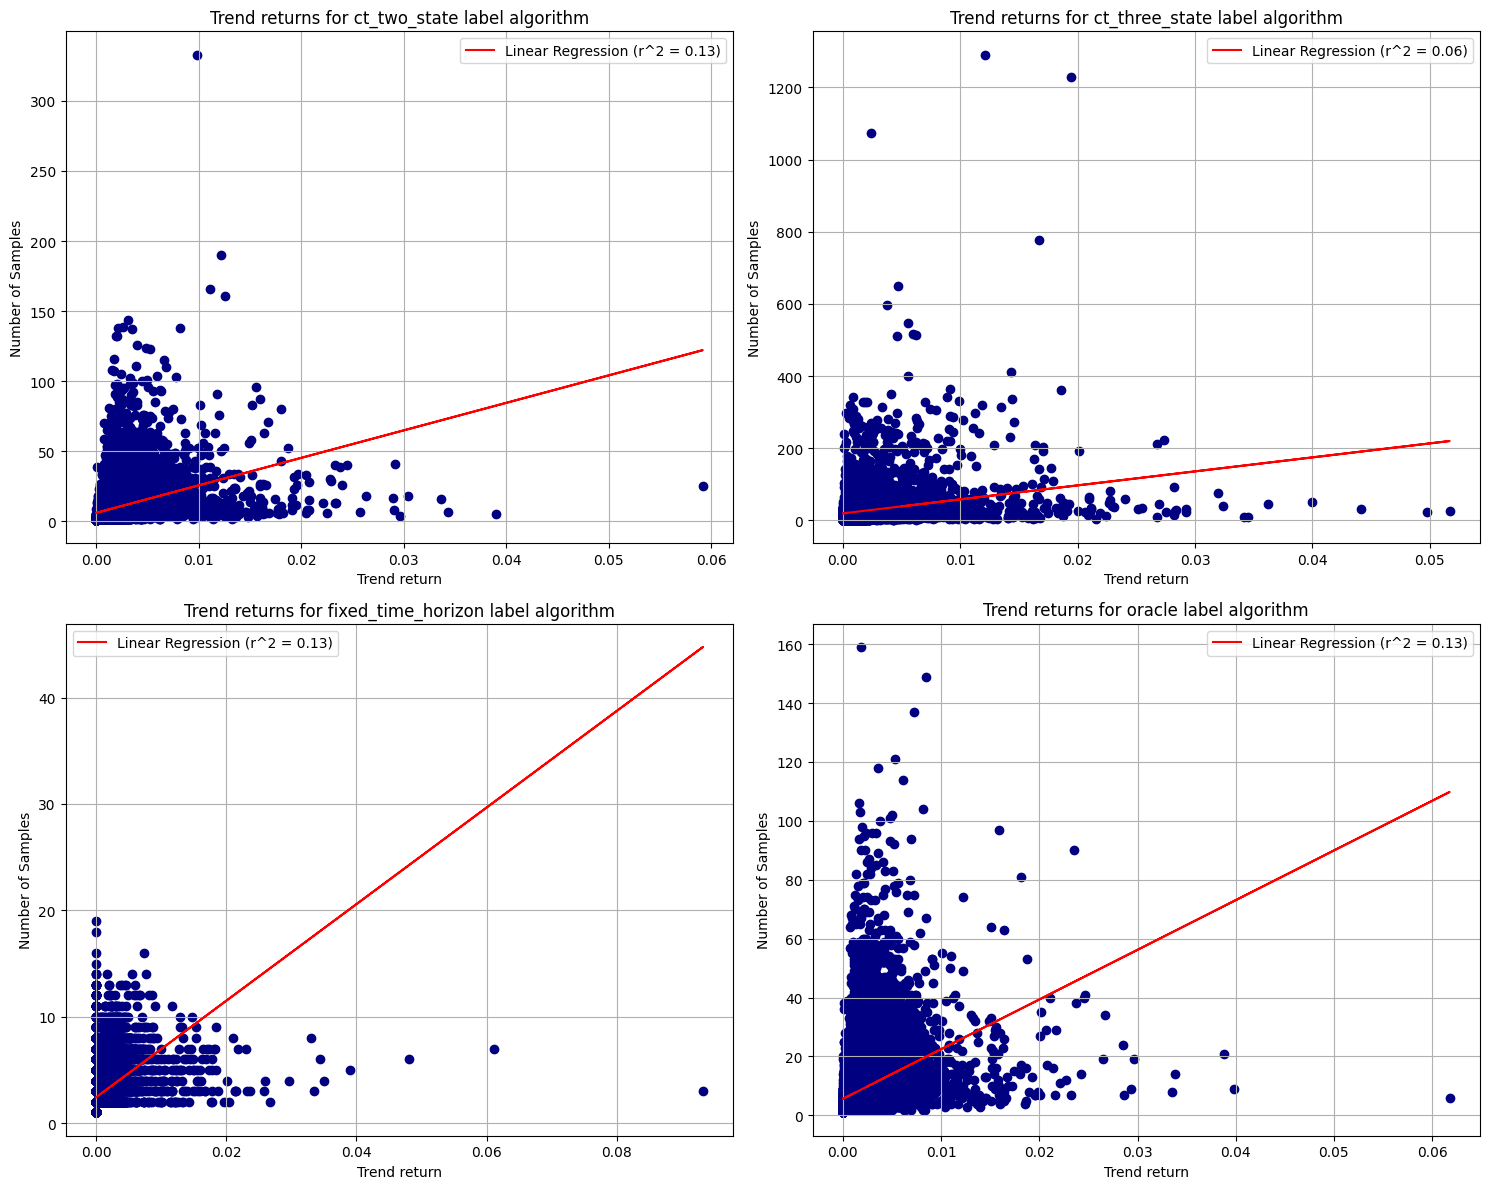

In [3]:
def compute_trend_absolute_returns(prices: pd.Series, labels: pd.Series) -> pd.Series:
    prices = prices[prices.index.isin(labels.index)]
    trend_returns = pd.Series(np.NaN, index=labels.index)
    
    trend_start_i = 0  # Start index of the trend

    for i, label in enumerate(labels.iloc[1:], start=1):
        if label != labels.iloc[trend_start_i] or i == len(labels) - 1:
            # End of the trend interval
            trend_end_i = i - 1 if label != labels.iloc[trend_start_i] else i
            # Calculate the absolute return for the trend interval
            absolute_return = abs(prices.iloc[trend_end_i] / prices.iloc[trend_start_i] - 1)
            for j in range(trend_start_i, trend_end_i + 1):
                trend_returns.iloc[j] = absolute_return
            trend_start_i = i  # Update the start of the new trend
    
    return trend_returns

title_list = []
returns_list = []
for label_name, label_series in labels_train_dict.items():
    if label_name == 'triple_barrier':
        continue
    returns_s = compute_trend_absolute_returns(feat_train_df['Close'], label_series)
    title_list.append(f'Trend returns for {label_name} label algorithm')
    returns_list.append(returns_s)
    
plot_utils.plot_value_occurrences_with_regression(title_list, returns_list, 'Trend return')

## Weight Plots

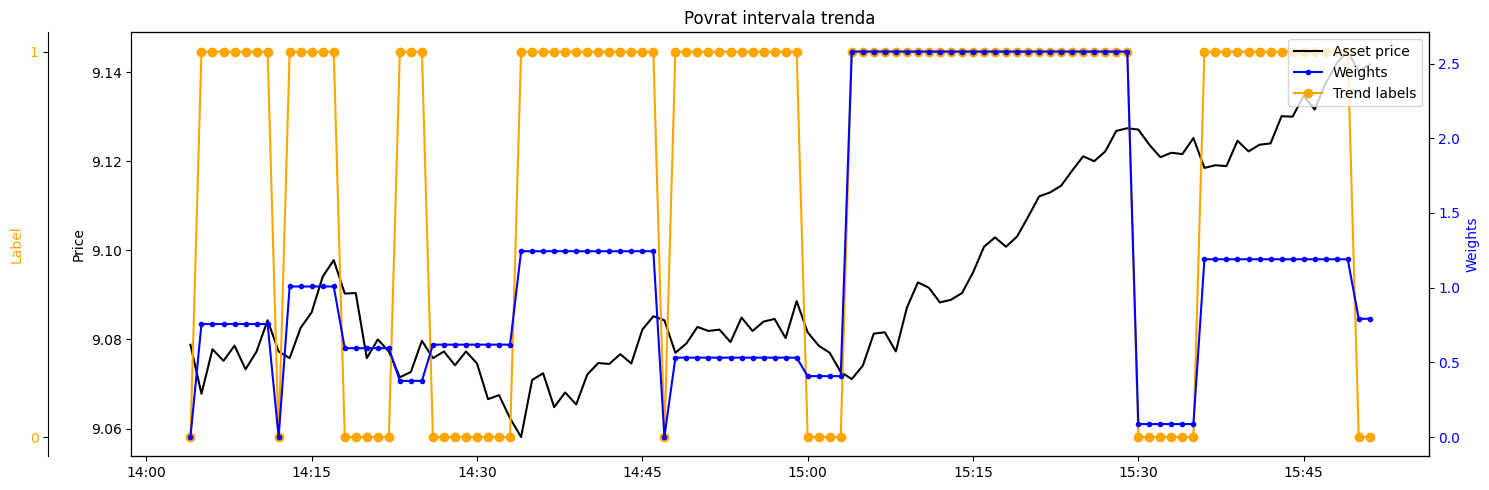

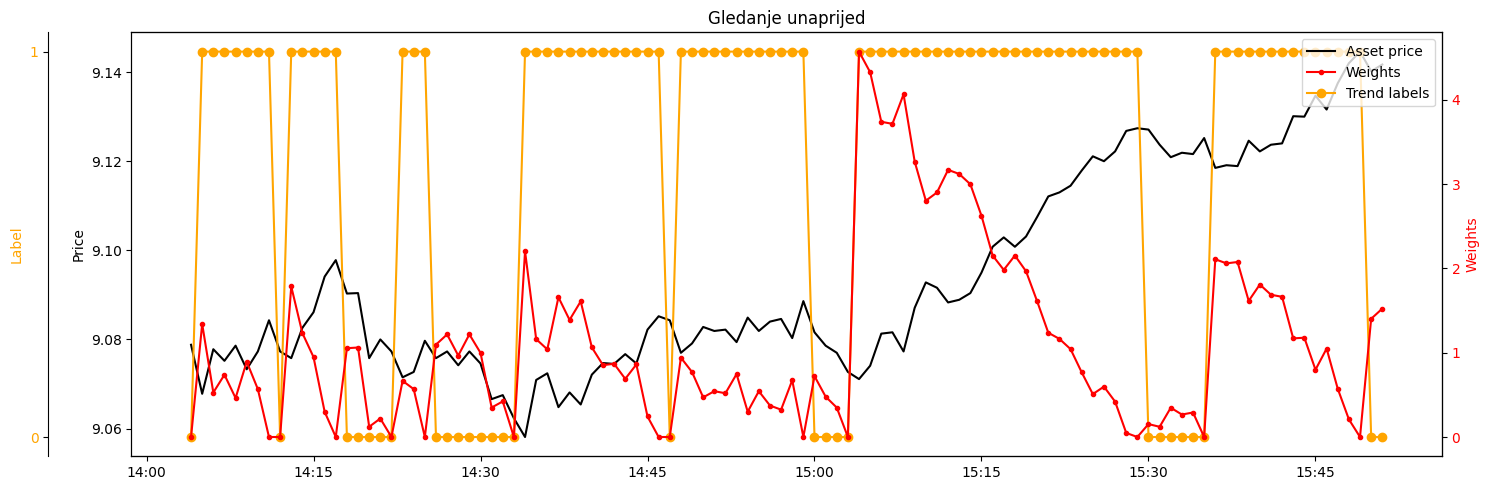

In [28]:
from weights import trend_interval_return
start_index = 352
end_index = 460
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels = labels_train_dict['oracle'].iloc[start_index:end_index]
weights_dict = {}
for weight_alg, weights in weights_train_dict['oracle'].items():
    if weight_alg in ['trend_interval_return', 'forward_looking']:
        weights_dict[weight_alg] = weights.iloc[start_index:end_index]

_weights = weights_train_dict['oracle']['trend_interval_return'].iloc[start_index:end_index]
weight_utils.plot_weights('Povrat intervala trenda', prices, labels_dict['oracle'], _weights, 'blue')
_weights = weights_train_dict['oracle']['forward_looking'].iloc[start_index:end_index]
weight_utils.plot_weights('Gledanje unaprijed', prices, labels_dict['oracle'], _weights, 'red')

## Weights Distribution

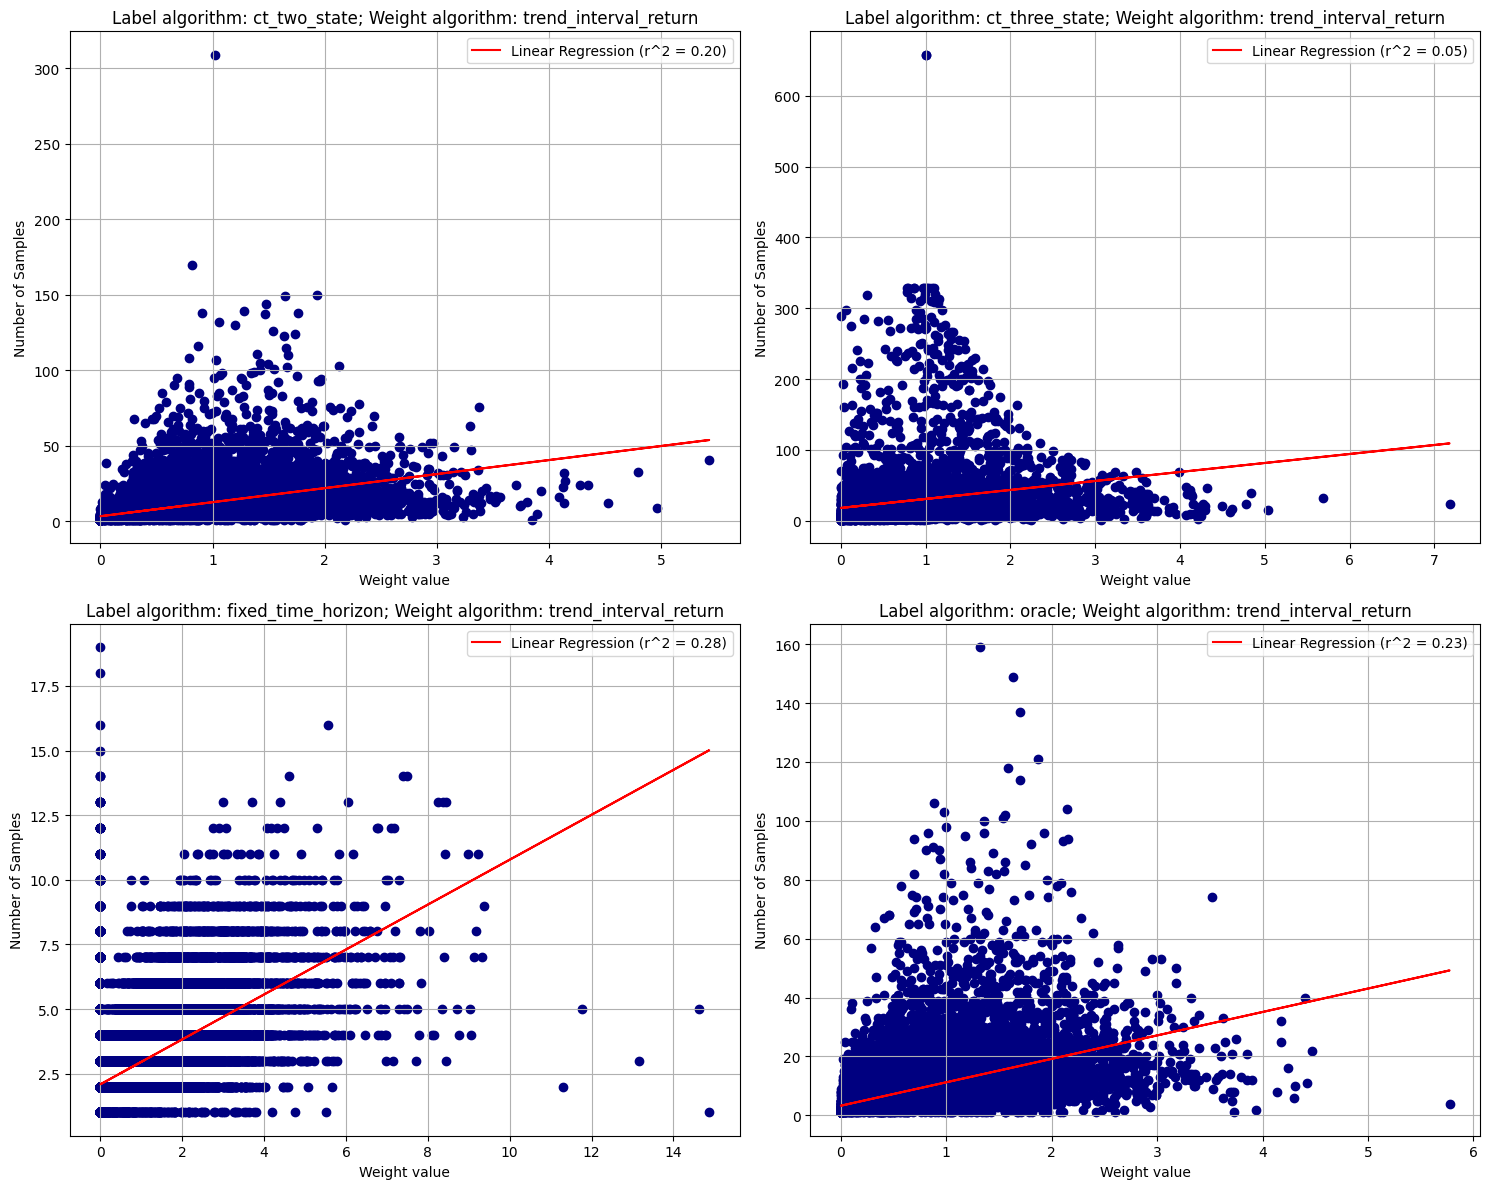

In [3]:
title_list = []
weights_list = []
for label_name, weights in weights_train_dict.items():
    if label_name == 'triple_barrier':
        continue
    title_list.append(f'Label algorithm: {label_name}; Weight algorithm: trend_interval_return')
    weights_list.append(weights['trend_interval_return'])

    
plot_utils.plot_value_occurrences_with_regression(title_list, weights_list, 'Weight value')

## Accuracy, AUC Tables

In [6]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/2_years-xgb/metrics.json', 'r') as file:
    metrics = json.load(file)

print('XGBoost - train data: 2 years, test data: 2 weeks')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'test')

XGBoost - train data: 2 years, test data: 2 weeks
Table for Accuracy:
+--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------+
| Label              |   CB_none | none                   |   CB_trend_interval_return |   trend_interval_return | CB_forward_looking     |   forward_looking |
|--------------------+-----------+------------------------+----------------------------+-------------------------+------------------------+-------------------|
| ct_three_state     |  0.496489 | **0.8513011152416357** |                   0.850062 |                0.839736 | 0.8327137546468402     |          0.850888 |
| ct_two_state       |  0.490706 | **0.6555142503097894** |                   0.619166 |                0.629905 | 0.6100784799669559     |          0.529533 |
| fixed_time_horizon |  0.705081 | **0.724907063197026**  |                   0.583643 |                0.583643 | 0.6650144568360

## ROC AUC Curve Plots

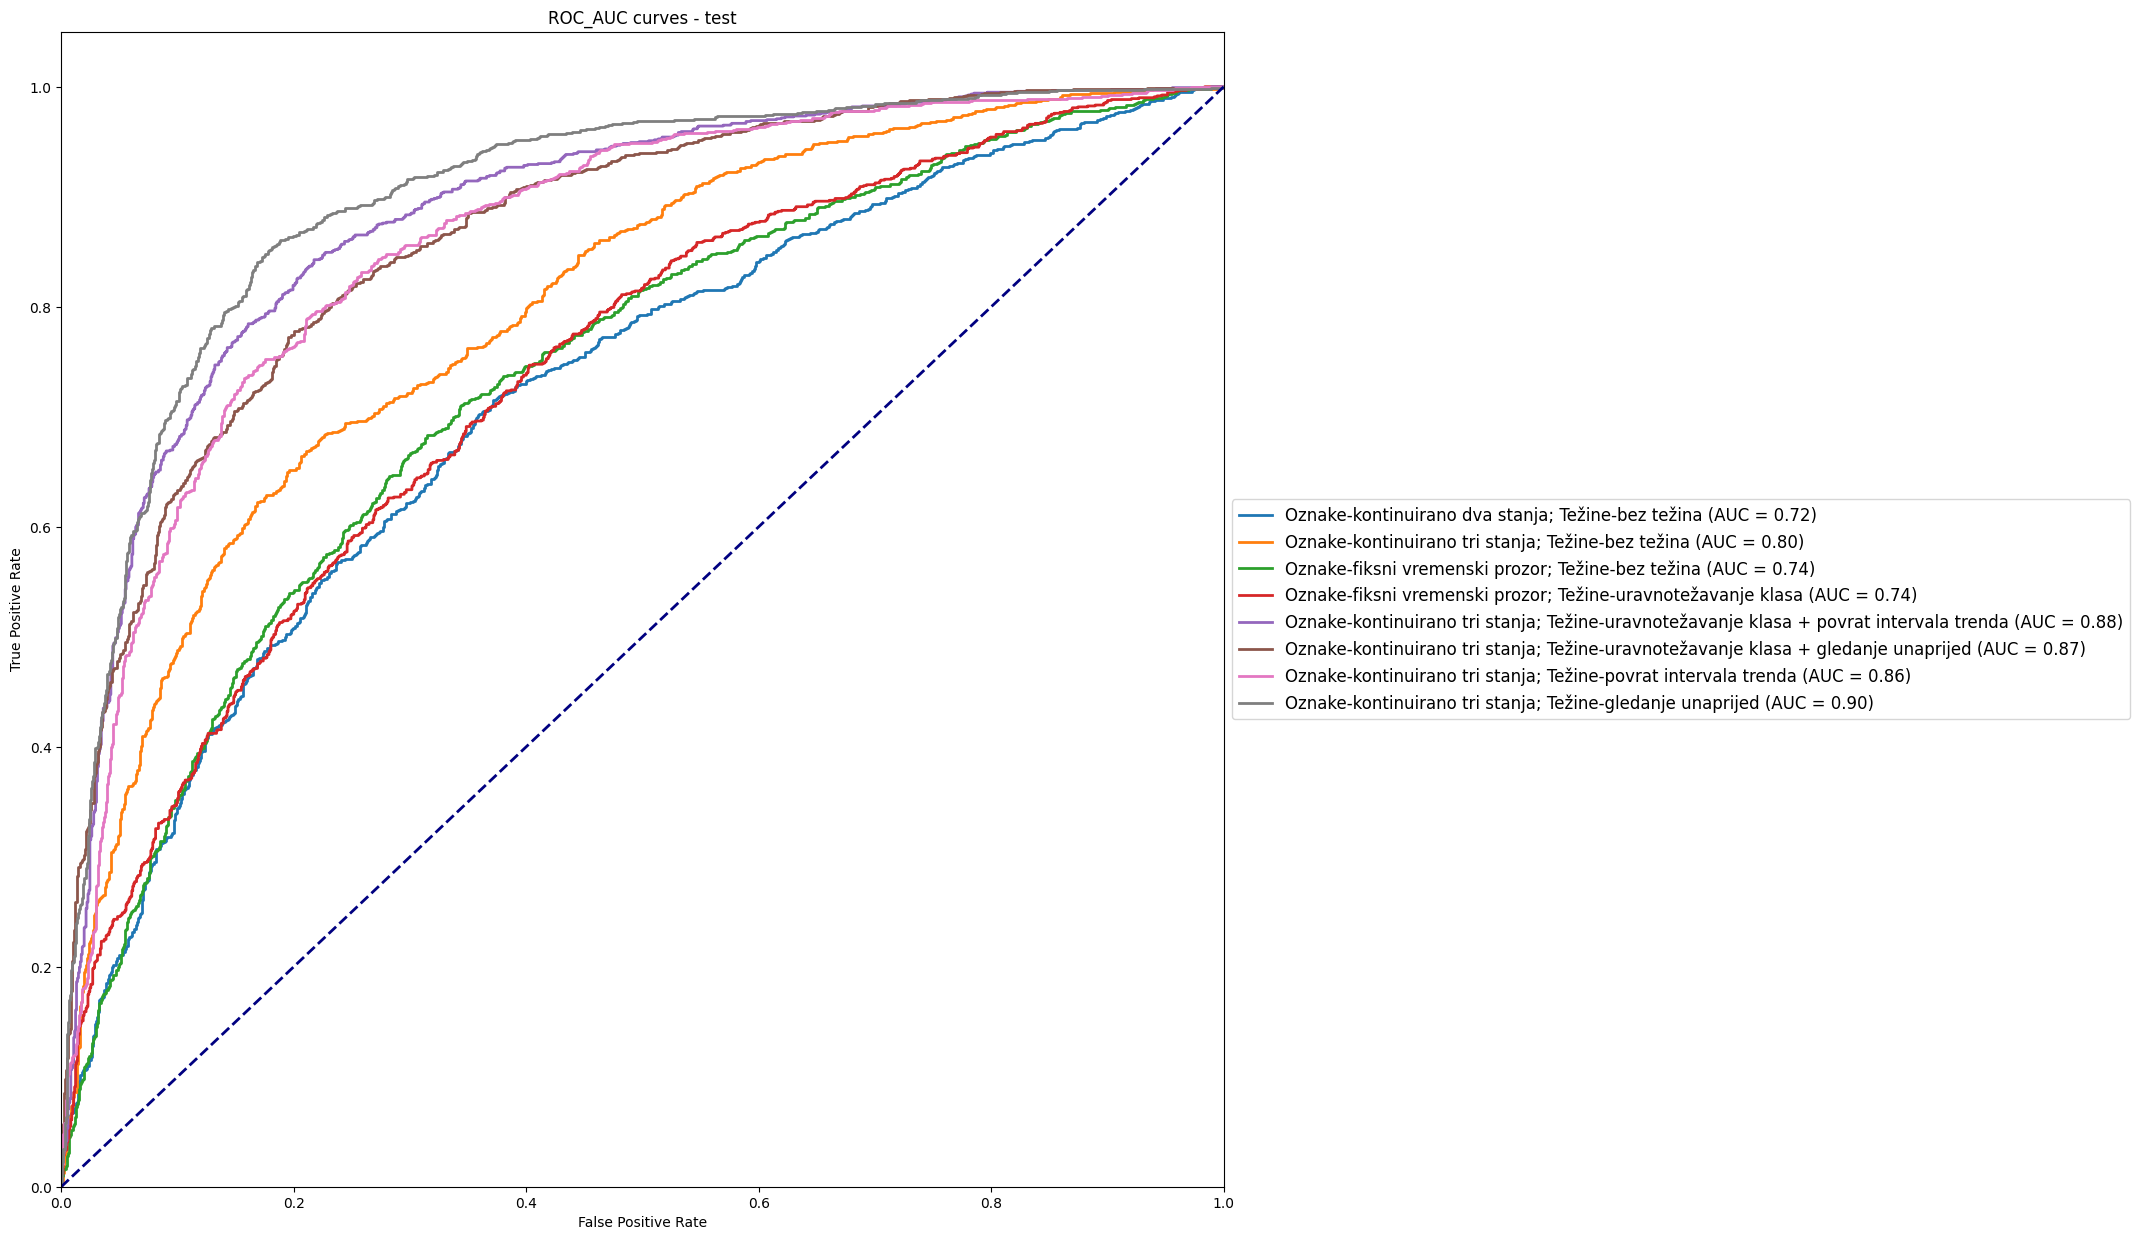

In [8]:
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/2_years-cv_5_folds/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y_or_W_day_separated(labels_test_dict[label_name], 60)
for comb_name, props in probs_test_dict.items():
    probs_test_dict[comb_name]['probs'] = probs_test_dict[comb_name]['probs'].reindex(Y_test_dict['oracle'].index)

plot_utils.plot_roc_auc_curves(Y_test_dict, probs_test_dict, 'ROC_AUC curves - test', exclude_auc_less_than=0.7, hr_legend=True)

## Isotonic Probability Calibration

2012-11-23 10:54:00 2012-11-23 12:41:00
2012-11-23 10:54:00 2012-11-23 12:41:00


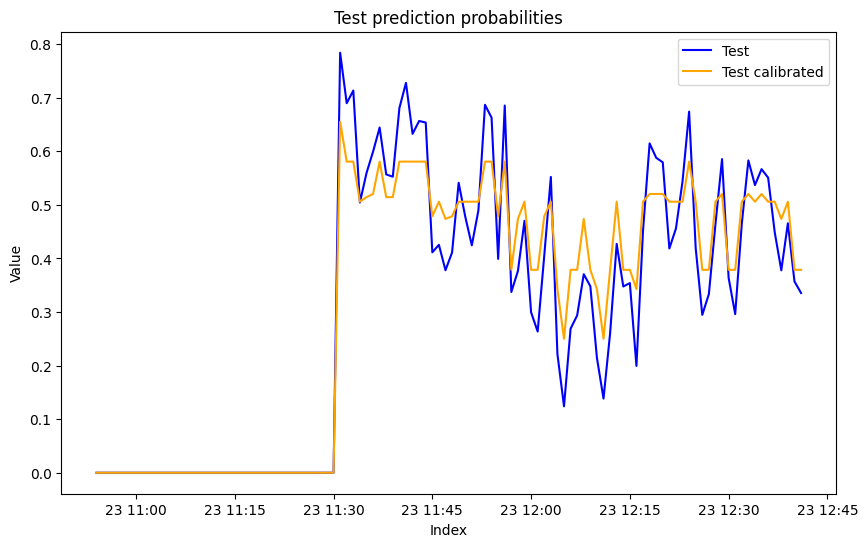

In [7]:
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs.pkl", 'rb') as file:
    probs_test_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs_calibrated.pkl", 'rb') as file:
    probs_test_calibrated_dict = pickle.load(file)

test = probs_test_dict['D-features;L-fixed_time_horizon;W-CB_trend_interval_return;M-transformer']['probs'].iloc[352:460]
test_calibrated = probs_test_calibrated_dict['D-features;L-fixed_time_horizon;W-CB_trend_interval_return;M-transformer']['probs'].iloc[352:460]
print(test.index[0], test.index[-1])
print(test_calibrated.index[0], test_calibrated.index[-1])

plot_utils.plot_series(test, test_calibrated, 'Test', 'Test calibrated', 'Test prediction probabilities')

## Backtest Results

In [7]:
# with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/metrics.json', 'r') as file:
#     metrics = json.load(file)
# data_types = ['best_model_test']
# plot_utils.print_highlighted_LW_table(metrics, 'Cummulative Return', 'cumulative_return', 'best_model_test')
    
# test_calibrated_returns = {}
# with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/test_probs_calibrated.pkl", 'rb') as file:
#     probs_test_calibrated_dict = pickle.load(file)
# for model_name, model_dict in probs_test_calibrated_dict.items():
#     bt_result = backtest_utils.do_backtest(data, model_dict['probs'])
#     test_calibrated_returns[model_name] = {
#         'best_model_test': {
#             'cumulative_return': bt_result['Return [%]'] / 100
#         }
#     }
# plot_utils.print_highlighted_LW_table(test_calibrated_returns, 'Cummulative Return With Calibration', 'cumulative_return', 'best_model_test')


with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/2_years-xgb/metrics.json', 'r') as file:
    metrics = json.load(file)

plot_utils.print_highlighted_LW_table(metrics, 'Cummulative Return', 'cumulative_return', 'test')
plot_utils.print_highlighted_LW_table(metrics, 'Exposure Time', 'exposure_time', 'test')
plot_utils.print_highlighted_LW_table(metrics, 'Trades', 'trades', 'test')

Table for Cummulative Return:
+--------------------+--------------------------+------------+----------------------------+-------------------------+--------------------------+--------------------------+
| Label              | CB_none                  |       none |   CB_trend_interval_return |   trend_interval_return | CB_forward_looking       | forward_looking          |
|--------------------+--------------------------+------------+----------------------------+-------------------------+--------------------------+--------------------------|
| ct_three_state     | **0.027950400992000142** | -0.0607698 |                 -0.0575512 |              -0.0478744 | -0.04149768640799412     | -0.06323882000399335     |
| ct_two_state       | **0.0**                  | -0.165541  |                 -0.100616  |              -0.117858  | -0.1813735756999804      | -0.016219624375997044    |
| fixed_time_horizon | -0.20680037505597842     | -0.215634  |                 -0.197236  |              -0.18

## Buy and Hold / 100% Trend Prediction Results

In [9]:
data = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/CL/data/feat/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
data.index = pd.to_datetime(data.index)

with open("/home/mdzaja/MasterThesis/artifacts/assets/CL/labels/all_labels_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_dict = {}
for label_name in labels_test_dict.keys():
    if label_name == 'triple_barrier':
        continue
    labels = model_utils.get_Y_or_W(labels_test_dict[label_name], 60)
    combined_index = labels.index.union(data.index)
    Y_dict[label_name] = labels.reindex(combined_index, fill_value=0)

results = {}
for label_name, labels in Y_dict.items():
    model_name = f'D-dummy;L-{label_name};W-perfect_classifier;M-dummy'
    bt_result = backtest_utils.do_backtest(data, Y_dict[label_name])
    results[model_name] = {
        'perfect_classifier': {
            'cumulative_return': bt_result['Return [%]'] / 100,
            "exposure_time": bt_result['Exposure Time [%]'] / 100,
            "trades": bt_result['# Trades'],
            "duration": bt_result['Duration']
        }
    }
plot_utils.print_highlighted_LW_table(results, 'Cummulative Return With Perfect Classifier', 'cumulative_return', 'perfect_classifier')


bt_result = backtest_utils.do_backtest_w_buy_n_hold(data)
print('Buy and hold-cumulative return =', bt_result['Return [%]'] / 100)


Table for Cummulative Return With Perfect Classifier:
+--------------------+---------------------------+
| Label              | perfect_classifier        |
|--------------------+---------------------------|
| ct_three_state     | **-0.044780661199995665** |
| ct_two_state       | **0.2036411508000054**    |
| fixed_time_horizon | **-0.312735025599967**    |
| oracle             | **0.3203022356000116**    |
+--------------------+---------------------------+

Buy and hold-cumulative return = 0.016042079999999986
